In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np

In [4]:
import seaborn as sns
sns.set()

## 1. Importation des données

Pour tester les perfomances de lectures nous allons simplement collecter toutes les données ainsi spark devra lire toutes les données (simplement compter le nombre de lignes ne serait pas significatif car spark utiliserait des metadatas)


###### Spark

df = spark.read.csv('./data/train.csv', header=True, escape='"')

_ = df.collect()

8.21 s

###### Pandas

df_full = pd.read_csv('./data/train.csv')

1.15 s

Dans la suite l'etude nous allons comparer spark et pandas pour des datasets de taille 1k, 10k, 100k and 400k

## 3. Nettoyage des données

Pour le nettoyage des données nous avons:
- supprimé les questions vides
- retiré les stopwords
- passé le text en minuscule
- tokenizé les questions

In [5]:
pandas_cleaning_time = \
{400000: 3.833127975463867,
 1000: 0.01153707504272461,
 10000: 0.08499813079833984,
 100000: 1.0665977001190186,
 800000: 8.105329990386963,
 1200000: 11.493905782699585}

In [6]:
spark_cleaning_time = \
{400000: 2.653337001800537,
 1000: 0.35204505920410156,
 10000: 0.4665029048919678,
 100000: 1.6463570594787598,
 800000: 4.191261053085327,
 1200000: 5.909671783447266}

In [7]:
def plot_data(pandas_dict, spark_dict, title):
    pandas_data = np.array(sorted(list(pandas_dict.items())))    
    spark_data = np.array(sorted(list(spark_dict.items())))
    fig = plt.figure()
    plt.plot(np.log10(pandas_data[:,0]),pandas_data[:,1] , marker='+')
    plt.plot(np.log10(spark_data[:,0]),spark_data[:,1] , marker='+')
    plt.legend(['pandas', 'spark'])
    plt.title(title)
    plt.xlabel("log(Nombre d'echantillons)")
    plt.ylabel('Durée (s)')
    return fig

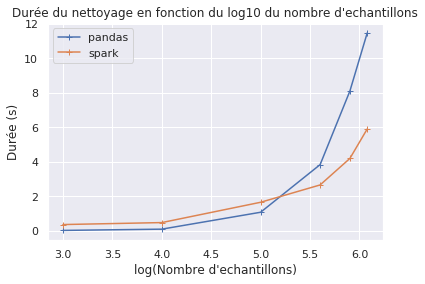

In [8]:
title = "Durée du nettoyage en fonction du log10 du nombre d'echantillons"
plot_data(pandas_cleaning_time, spark_cleaning_time, title)
plt.savefig('cleaning_duration.jpg')

## 4.  Représentation des données.

Pour la representation des données nous avons:
- Compter le nombre de mots communs entre les questions
- Compter le nombre de mots communs entre les questions pondérés par l'idf

###### idf

In [9]:
pandas_idf_time = \
{1000: 0.015150070190429688,
 10000: 0.04743003845214844,
 100000: 0.3630099296569824,
 400000: 1.2766520977020264,
 800000: 1.420454740524292,
 1200000: 1.794395923614502}

In [10]:
spark_idf_time = \
{400000: 4.612832069396973,
 1000: 0.34517502784729004,
 10000: 0.48408079147338867,
 100000: 1.6364638805389404,
 800000: 5.327709913253784,
 1200000: 7.245997190475464}

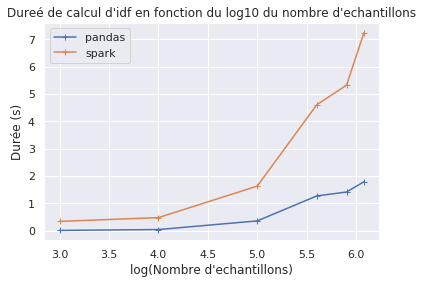

In [11]:
title = "Dureé de calcul d'idf en fonction du log10 du nombre d'echantillons"
fig = plot_data(pandas_idf_time, spark_idf_time, title)
plt.savefig('idf_duration.jpg')

###### Common words

In [12]:
pandas_common_words_time = \
{400000: 15.429856061935425,
 1000: 0.035256147384643555,
 10000: 0.351970911026001,
 100000: 3.493546962738037,
 800000: 30.880029916763306,
 1200000: 50.30730128288269}

In [13]:
spark_common_words_time = \
{1000: 0.15171313285827637,
 10000: 0.11482405662536621,
 100000: 0.5359230041503906,
 400000: 1.7709598541259766,
 800000: 1.7045090198516846,
 1200000: 2.117926836013794}

In [14]:
spark_common_words_time_with_udf =\
{1000: 0.7200469970703125,
 10000: 0.27631497383117676,
 100000: 1.1112160682678223,
 400000: 2.1631557941436768,
 800000: 3.177809953689575,
 1200000: 4.694714069366455}

In [15]:
spark_udf_data_udf = np.array(sorted(list(spark_common_words_time_with_udf.items())))    


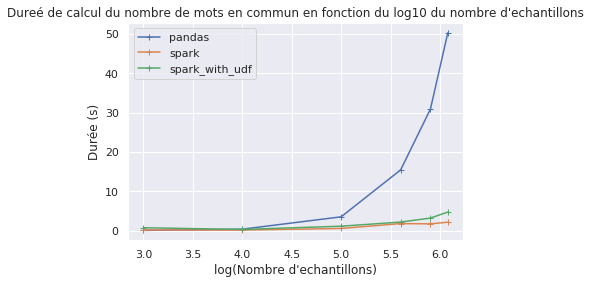

In [16]:
title = "Dureé de calcul du nombre de mots en commun en fonction du log10 du nombre d'echantillons"
plot_data(pandas_common_words_time, spark_common_words_time, title)
plt.plot(np.log10(spark_udf_data_udf[:,0]),spark_udf_data_udf[:,1] , marker='+')
plt.legend(['pandas', 'spark', 'spark_with_udf'])
plt.savefig('common_words_duration.jpg')

###### Common words idf weighted

In [21]:
pandas_common_words_idf_time = \
{400000: 25.642945051193237,
 1000: 0.052175045013427734,
 10000: 0.43926310539245605,
 100000: 3.947237014770508,
 800000: 32.78772020339966,
 1200000: 49.21293520927429}

In [22]:
spark_common_words_idf_time = \
{1000: 1.3751139640808105,
 10000: 1.370466947555542,
 100000: 3.8508951663970947,
 400000: 6.787045240402222,
 800000: 8.197191953659058,
 1200000: 32.96792387962341}

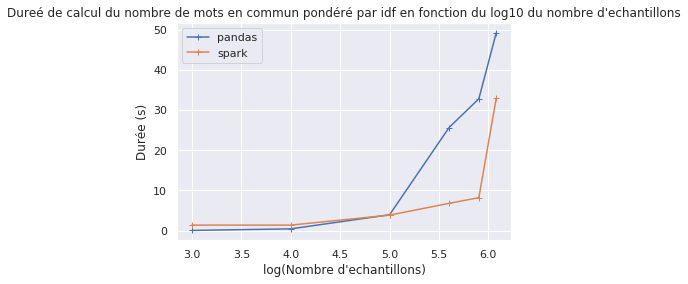

In [23]:
title = "Dureé de calcul du nombre de mots en commun pondéré par idf en fonction du log10 du nombre d'echantillons"
plot_data(pandas_common_words_idf_time, spark_common_words_idf_time, title)
plt.savefig('common_words_idf_duration.jpg')

## 4.  Apprentissage et performance

Pour tester les perfomances des modeles nous allons entrainer une regression logistic, un random forest et un arbre de decision

###### regression logisitique

In [24]:
sklearn_logisitique_time = \
{400000: 0.33588671684265137,
 1000: 0.0021741390228271484,
 10000: 0.006098031997680664,
 100000: 0.06316709518432617,
 800000: 0.61788010597229,
 1200000: 0.9612510204315186}

In [25]:
spark_logistique_time = \
{1000: 0.5644731521606445,
 10000: 0.6493039131164551,
 100000: 0.9996500015258789,
 400000: 2.5949480533599854,
 800000: 3.173823118209839,
 1200000: 5.683064222335815}

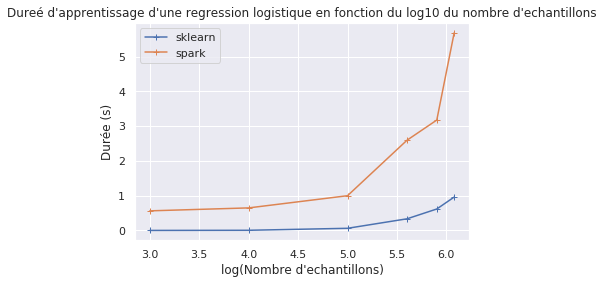

In [26]:
title = "Dureé d'apprentissage d'une regression logistique en fonction du log10 du nombre d'echantillons"
plot_data(sklearn_logisitique_time, spark_logistique_time, title)
plt.legend(['sklearn', 'spark'])
plt.savefig('regression_logistique_duration.jpg')

###### Arbre de decision

In [27]:
sklearn_decision_tree_time = \
{400000: 1.048037052154541,
 1000: 0.0037539005279541016,
 10000: 0.016834020614624023,
 100000: 0.19215893745422363,
 800000: 2.2114639282226562,
 1200000: 3.7533140182495117}

In [28]:
spark_decision_tree_time =\
{1000: 1.2671706676483154,
 10000: 1.3924741744995117,
 100000: 0.9892888069152832,
 400000: 2.2401349544525146,
 800000: 2.6141581535339355,
 1200000: 4.613914966583252}

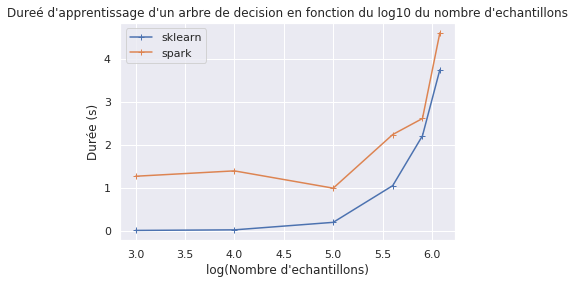

In [29]:
title = "Dureé d'apprentissage d'un arbre de decision en fonction du log10 du nombre d'echantillons"
plot_data(sklearn_decision_tree_time, spark_decision_tree_time, title)
plt.legend(['sklearn', 'spark'])
plt.savefig('decision_tree_duration.jpg')

###### Random forest

In [30]:
sklearn_rf_time = \
{400000: 5.257158279418945,
 1000: 0.012971639633178711,
 10000: 0.06613922119140625,
 100000: 0.8663570880889893,
 800000: 14.837876796722412,
 1200000: 25.868048191070557}

In [31]:
spark_rf_time = \
{1000: 0.7193012237548828,
 10000: 0.7812149524688721,
 100000: 2.272455930709839,
 400000: 5.494510889053345,
 800000: 7.683736801147461,
 1200000: 10.278573036193848}

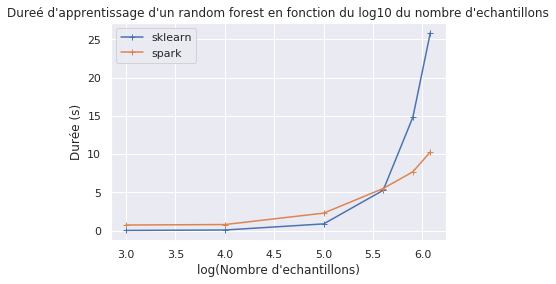

In [32]:
title = "Dureé d'apprentissage d'un random forest en fonction du log10 du nombre d'echantillons"
plot_data(sklearn_rf_time, spark_rf_time, title)
plt.legend(['sklearn', 'spark'])
plt.savefig('random_forest_duration.jpg')